In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv('cardio_train.csv',delimiter=';')
print(df.shape)
df.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
negative_systolic_values = df.loc[df['ap_hi']<0,'ap_hi'].unique()
for i in negative_systolic_values:
  df['ap_hi'].replace(negative_systolic_values,abs(negative_systolic_values), inplace=True)

negative_diastolic_values = df.loc[df['ap_lo']<0,'ap_lo'].unique()
for i in negative_diastolic_values:
  df['ap_lo'].replace(negative_diastolic_values,abs(negative_diastolic_values), inplace=True)

In [8]:
out = df.loc[df['height']<120].index
df.drop(out, inplace= True, axis = 0)

out1 = df.loc[df['ap_hi']>370].index
df.drop(out1, inplace= True, axis = 0)

out2 = df.loc[df['ap_lo']>360].index
df.drop(out2, inplace= True, axis = 0)

out3 = df.loc[df['ap_hi']<50].index
df.drop(out3, inplace= True, axis = 0)

out4 = df.loc[df['ap_lo']<20].index
df.drop(out4, inplace= True, axis = 0)

out5 = df.loc[df['weight']<50].index
df.drop(out5, inplace= True, axis = 0)

y = df['cardio']
df.drop(['id', 'cardio'], inplace= True, axis = 1)

df['weight'] = df['weight'].astype(int)
numerical_feats = df.dtypes[df.dtypes == "int64"].index

<AxesSubplot:>

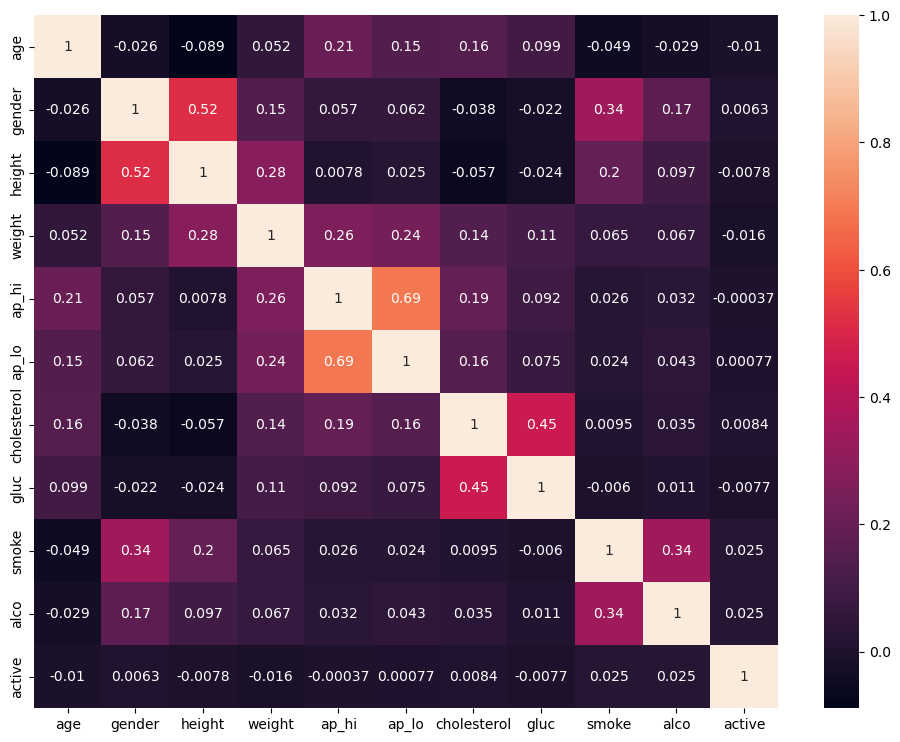

In [9]:
corr = df[numerical_feats].corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.1,random_state=10,stratify=y)

In [11]:
s = StandardScaler()
s.fit(x_train)
x_train_std = s.transform(x_train)
x_test_std = s.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)

In [15]:
x_train_std.columns = list(df.columns)
x_test_std.columns = list(df.columns)
x_train_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.455856,-0.736782,0.056614,-0.036659,0.788308,0.881106,-0.538628,-0.397542,-0.311365,-0.239038,0.493418
1,-0.587684,-0.736782,-1.090285,-1.396544,-0.406386,-0.150729,-0.538628,-0.397542,-0.311365,-0.239038,0.493418
2,-0.781547,1.357254,-0.070820,-0.322951,-1.003732,-1.182563,0.929893,3.085549,-0.311365,-0.239038,-2.026679
3,1.327432,-0.736782,-0.835419,2.325245,2.580349,1.912940,2.398413,-0.397542,-0.311365,-0.239038,0.493418
4,-0.856578,1.357254,1.076079,-1.396544,0.190961,0.881106,-0.538628,-0.397542,-0.311365,-0.239038,-2.026679


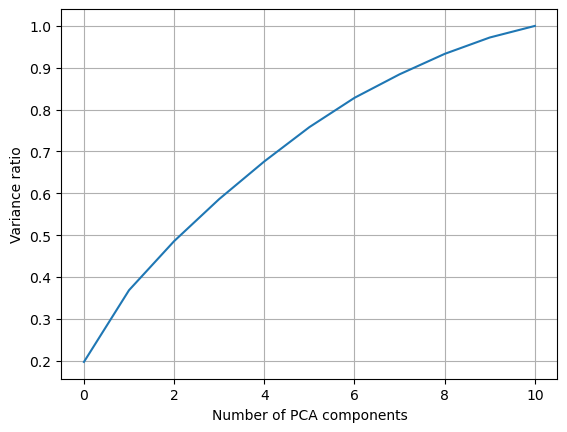

In [13]:
pca = PCA(n_components=None) 
pca.fit(x_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PCA components')
plt.ylabel('Variance ratio')
plt.grid(True)

In [16]:
pca_final = PCA(n_components=7)
pca_final.fit(x_train_std)
x_train_pca = pca_final.transform(x_train_std)
x_test_pca = pca_final.transform(x_test_std)

In [20]:
parameters_LR_PCA = {'solver':('lbfgs', 'sag', 'saga')}
classifier_LR_PCA = LogisticRegression(fit_intercept = True)
clf_LR_PCA = GridSearchCV(classifier_LR_PCA, parameters_LR_PCA, scoring='recall', cv=10, verbose=3)
clf_LR_PCA.fit(x_train_pca, y_train)

print("LOG REG PCA:")
print("best score: ", clf_LR_PCA.best_score_)
print("best hyperparameters: ", clf_LR_PCA.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END .....................solver=lbfgs;, score=0.670 total time=   0.7s
[CV 2/10] END .....................solver=lbfgs;, score=0.695 total time=   0.1s
[CV 3/10] END .....................solver=lbfgs;, score=0.682 total time=   0.2s
[CV 4/10] END .....................solver=lbfgs;, score=0.682 total time=   0.3s
[CV 5/10] END .....................solver=lbfgs;, score=0.684 total time=   0.2s
[CV 6/10] END .....................solver=lbfgs;, score=0.674 total time=   0.2s
[CV 7/10] END .....................solver=lbfgs;, score=0.680 total time=   0.2s
[CV 8/10] END .....................solver=lbfgs;, score=0.684 total time=   0.2s
[CV 9/10] END .....................solver=lbfgs;, score=0.683 total time=   0.3s
[CV 10/10] END ....................solver=lbfgs;, score=0.673 total time=   0.1s
[CV 1/10] END .......................solver=sag;, score=0.670 total time=   0.8s
[CV 2/10] END .......................solver=sag;

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Users/danilobabic/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/10] END .....................solver=lbfgs;, score=0.648 total time=   1.9s
[CV 2/10] END .....................solver=lbfgs;, score=0.667 total time=   1.8s


/Users/danilobabic/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/10] END .....................solver=lbfgs;, score=0.641 total time=   2.0s
[CV 4/10] END .....................solver=lbfgs;, score=0.662 total time=   1.3s
[CV 5/10] END .....................solver=lbfgs;, score=0.664 total time=   1.0s
[CV 6/10] END .....................solver=lbfgs;, score=0.649 total time=   0.9s


/Users/danilobabic/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 7/10] END .....................solver=lbfgs;, score=0.662 total time=   2.2s
[CV 8/10] END .....................solver=lbfgs;, score=0.655 total time=   1.6s
[CV 9/10] END .....................solver=lbfgs;, score=0.658 total time=   1.6s
[CV 10/10] END ....................solver=lbfgs;, score=0.648 total time=   1.0s
sensitivity/recall:  0.6513625592417062
precision:  0.724308300395257
accuracy:  0.7028622012393037
F score:  0.6859014348097318


'              precision    recall  f1-score   support\n\n           0       0.69      0.75      0.72      3402\n           1       0.72      0.65      0.69      3376\n\n    accuracy                           0.70      6778\n   macro avg       0.70      0.70      0.70      6778\nweighted avg       0.70      0.70      0.70      6778\n'

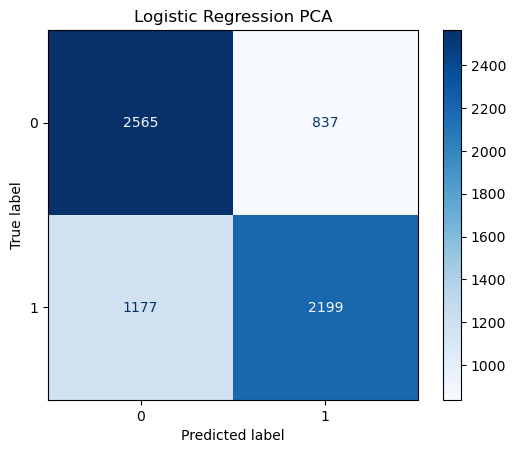

In [23]:
parameters_LR = {'solver': ['lbfgs']}
classifier_LR = LogisticRegression(fit_intercept=True)
clf_LR = GridSearchCV(classifier_LR, parameters_LR, scoring='recall', cv=10, verbose=3)
clf_LR.fit(x_train, y_train)
y_pred_LR = clf_LR.predict(x_test)

accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
precision_LR = metrics.precision_score(y_test, y_pred_LR)
recall_LR = metrics.recall_score(y_test, y_pred_LR)
f1_score_LR = metrics.f1_score(y_test, y_pred_LR)
macro_f1 = metrics.f1_score(y_test, y_pred_LR, average='macro')
micro_f1 = metrics.f1_score(y_test, y_pred_LR, average='micro')

print('sensitivity/recall: ', recall_LR)
print('precision: ', precision_LR)
print('accuracy: ', accuracy_LR)
print('F score: ', f1_score_LR)
print('Macro F1 Score: ', macro_f1)
print('Micro F1 Score: ', micro_f1)

conf_mat_LR = confusion_matrix(y_test, y_pred_LR)
disp_LR = ConfusionMatrixDisplay(confusion_matrix=conf_mat_LR, display_labels=clf_LR.classes_)
disp_LR.plot(cmap="Blues")
plt.title('Logistic Regression PCA')
classification_report(y_test, y_pred_LR)

In [ ]:
parameters_RFT_PCA = {'n_estimators': [100, 325, 550, 775, 1000],'max_depth': [10, 50, 100]}
classifier_RFT_PCA = RandomForestClassifier()
clf_RFT_PCA = GridSearchCV(classifier_RFT_PCA, parameters_RFT_PCA, scoring='recall', cv=10, verbose=3)
clf_RFT_PCA.fit(x_train_pca, y_train)

print("RFT PCA:")
print("best score: ", clf_RFT_PCA.best_score_)
print("best hyperparameters: ", clf_RFT_PCA.best_params_)

In [ ]:
parameters_SVC_pca = {'C':[0.1, 1, 10], 'gamma':[0.1, 1, 10]}
classifier_SVC_pca = SVC(kernel = 'rbf')
clf_SVC_pca = GridSearchCV(classifier_SVC_pca, parameters_SVC_pca, scoring='recall', cv=10, verbose=3,n_jobs=-1)
clf_SVC_pca.fit(x_train_pca,y_train)

print("best score: ", clf_SVC_pca.best_score_)
print("best hyperparameters: ", clf_SVC_pca.best_params_)

sensitivity/recall:  0.7008293838862559
precision:  0.7141563537579233
accuracy:  0.7112717615815874
F score:  0.7074301091343996


Text(0.5, 1.0, 'Random Forest Tree')

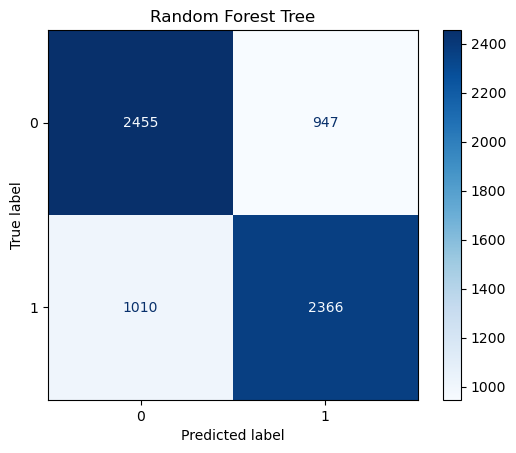

In [18]:
classifier_RFT_test = RandomForestClassifier(max_depth = 50, n_estimators = 325)
classifier_RFT_test.fit(x_train, y_train)
y_predicted_RFT_test = classifier_RFT_test.predict(x_test)

sensitivity = metrics.recall_score(y_test, y_predicted_RFT_test)
precision = metrics.precision_score(y_test, y_predicted_RFT_test)
accuracy = metrics.accuracy_score(y_test, y_predicted_RFT_test)
f_score = metrics.f1_score(y_test, y_predicted_RFT_test)
macro_f1 = metrics.f1_score(y_test, y_predicted_RFT_test, average='macro')
micro_f1 = metrics.f1_score(y_test, y_predicted_RFT_test, average='micro')

print('sensitivity/recall: ', sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('F score: ', f_score)
print('Macro F1 Score: ', macro_f1)
print('Micro F1 Score: ', micro_f1)
                            
conf_mat = confusion_matrix(y_test, y_predicted_RFT_test, labels=classifier_RFT_test.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_RFT_test.classes_)
disp.plot(cmap="Blues")
plt.title('Random Forest Tree')
classification_report(y_test, y_pred)